# Hypothesis Test


##### It is assumed that the mean systolic blood pressure is μ = 120 mm Hg. In the Honolulu Heart Study, a sample of n = 100 people had an average systolic blood pressure of 130.1 mm Hg with a standard deviation of 21.21 mm Hg. Is the group significantly different (with respect to systolic blood pressure!) from the regular population?

- Set up the hypothesis test.
- Write down all the steps followed for setting up the test.
- Calculate the test statistic by hand and also code it in Python. It should be 4.76190. What decision can you make based on this calculated value?

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [19]:
def visual_test(statistic, critical, dist = 'Norm', df = 0):
    '''
    Function to plot the normal or the t-student distribution 
    showing the location of the critical values and the statistic location.
    Inputs:
        statistic -> user's statistic
        critical  -> critical value
    Parameter:
        dist -> distribution to use
        df   -> degrees of freedom
    Outputs:
        Plots the corresponding distribution showin the user statistic location and the critical value.
    '''

    mu = 0
    sigma = 1

    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    x0 = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)

    if ( dist == 'Norm' ):
        plt.plot(x, stats.norm.pdf(x, mu, sigma))
        plt.fill_between(x0,stats.norm.pdf(x, mu, sigma),where = (x < -critical),facecolor='red')
        plt.fill_between(x0,stats.norm.pdf(x, mu, sigma),where = (x > critical),facecolor='red')
    else:
        if ( df == 0 ):
            while ( df == 0 or type(df) != int):
                try:
                    df = int(input("Set the correct value of degrees of freedom please: " )) 
                except:
                    df = 0       
        plt.plot(x, stats.t.pdf(x,df))
        plt.fill_between(x0,stats.t.pdf(x,df),where = (x < -critical),facecolor='red')
        plt.fill_between(x0,stats.t.pdf(x,df),where = (x > critical),facecolor='red')

    plt.axvline(-critical, c = 'r')
    plt.axvline(critical, c = 'r')
    plt.axvline(-statistic,c='b')
    plt.axvline(statistic,c='b')

    plt.show()

### Hypothesis test
- H0: μ= 120; H1: μ!= 120
- confidence level= 95%
- Using a t-score instead of a z-score because we don't have access to the population standard deviation







### Data
1. T = (x – μ) / (σ/√(n))
2. x = sample mean = 130.1
3. μ= population mean = 120
4. σ= sample standard deviation = 21.21
5. n = sample number= 100

In [ ]:
sample_mean = 130.1
population_mean = 120
sample_std = 21.21
n = 100

In [ ]:
#test static
t_score = (sample_mean - population_mean)/(sample_std/np.sqrt(n))
print("t-score is " + str(t_score))

Critic value of t from the Student's t distribution table with  = 0.05 and (n - 1) degrees of freedom:



In [ ]:
tc = stats.t.ppf(.975, df=99)
print("critical value is " + str(tc))

We compare both values:
Since 4.7619(t_score)> 1.9842(tc), we reject the null hypothesis and accept our Ha: μ!= 120

In a packing plant, a machine packs cartons with jars. It is supposed that a new machine will pack faster on the average than the machine currently used. To test that hypothesis, the times it takes each machine to pack ten cartons are recorded. The results, in seconds, are shown in the tables in the file Data/machine.txt. Assume that there is sufficient evidence to conduct the t test, does the data provide sufficient evidence to show if one machine is better than the other

In [11]:
machine = pd.read_csv('Data/Data_Machine.txt', sep="\t")
machine.columns = machine.columns.str.strip()
machine

,New Machine,Old Machine
0,42.1,42.7
1,41.0,43.6
2,41.3,43.8
3,41.8,43.3
4,42.4,42.5
5,42.8,43.5
6,43.2,43.1
7,42.3,41.7
8,41.8,44.0
9,42.7,44.1


H0: machines are equal. Ha: one machine is better
confdence level = 95%

In [13]:
mean_new = np.mean(machine['New Machine'])
mean_old = np.mean(machine['Old Machine'])
std_new = np.std(machine['New Machine'])
std_old = np.std(machine['Old Machine'])

In [15]:
t = ( mean_new - mean_old ) / np.sqrt( ((std_new**2)/10) + ((std_old**2)/10 ) )
t

-3.5809955894645813

In [17]:
tc = stats.t.ppf(1-(0.05/2),df=9) 
tc

2.2621571627409915

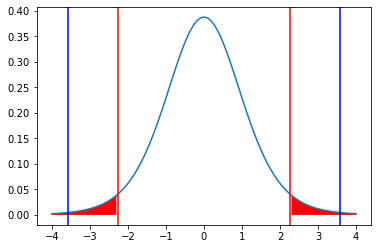

In [20]:
visual_test(t,tc,dist = 't',df=9)


We reject the hypothesis H0

In [22]:
#alternatively
stats.ttest_ind(machine['Old Machine'], machine['New Machine'])


Ttest_indResult(statistic=3.3972307061176026, pvalue=0.0032111425007745158)